# 종류
-------------------------

## 1. 지도

#### 1) Regression
+ 선형 회귀
            
#### 2) Classification
+ 로지스틱 선형 회귀
+ KNN
+ Decision Tree
+ Random Forest
+ SVM
+ Naive Bayes

##### -> Regression, Classification 분류 기준 : 결과값으로 판단
+ Regression : 실수형 : 구간안에서 수치 예측 
+ Classification : 이진분류, 다형분류 : 결과자체가 무엇을 선택해야하는지에대한 이상값


## 2. 비지도

#### 1) Clustering
+ K-means

## 3. 인공신경망(Artificial Neural Network)
+ 다층 퍼셉트론
+ 텐서플로우 사용

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

# mglearn
# pip install mglearn
import mglearn

from sklearn.model_selection import train_test_split

### 샘플 소개 

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


(26, 2)

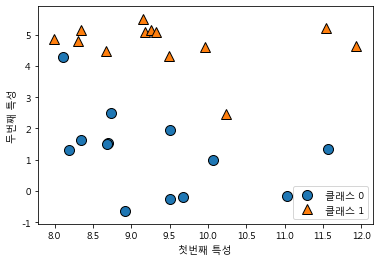

In [25]:
# 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge() 
# 두번째 array는 첫번째 array에 대한 정답 ex) 첫번째 [9.96 , 4.59]는 답이 1이다 
# X에는 2차원 배열, y에는 1차원배열 # X 두 점 을 가지므로 산포도 형태로 가져오자아아아

# 변수 확인
X
y

# 그래프 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)
# X[:,0] x좌표,  X[:,1] y좌표로 찍히고, 정답(1, 0)에 따라 나뉜 형태
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

# 데이터의 크기 알아내기
X.shape # 26개 2차원 배열


(-3, 3)

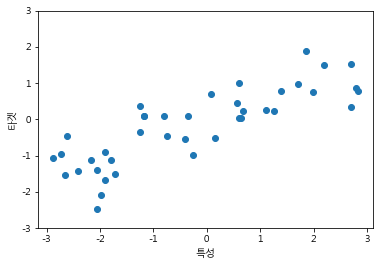

In [26]:
# 회귀 분석용 샘플
X, y = mglearn.datasets.make_wave(n_samples=40) # 2차원 배열 40개 만들기

# 그래프 
plt.plot(X, y, 'o') # 'o' 점의 모양
plt.xlabel("특성")
plt.ylabel("타겟")
plt.ylim(-3, 3)

In [64]:
# python에서 machine learning 맡은 package
# 유방암 데이터 샘플
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # dict로 묶여있음 / data : 데이터 / target : 정답 / target names : 정답에 대한 설명
cancer.keys() # 키 살펴보기 

# 각 값들 알아보기
cancer.data # 데이터
cancer.target # 정답
cancer.target_names # 정답에 대한 설명
cancer.DESCR # 데이터에 대한 컬럼 설명

# type 확인
print(type(cancer)) # Bunch라는 class 타입

<class 'sklearn.utils.Bunch'>


In [28]:
from sklearn.datasets import load_boston

# 보스톤 집값에 미치는 영향 알아보기 
boston = load_boston()

# 크기
boston.data.shape

(506, 13)

### 일반화, 과대적합(Overfitting), 과소적합(Underfitting)

    데이터 훈련용, 테스트용 으로 구별(7:3) 
    테스트용은 절대적으로 blind시키다가 훈련용이 완벽히 다 끝나면 사용
    데이터량 많을수록 학습 정확도 증가 
    
    + 과대적합 : 훈련세트의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만드는 것  
               : 훈련용의 정확도는 높지만 테스트용의 정확도가 낮은것
                 훈련용 데이터에 너무 세밀하게 맞춤. 훈련용 데이터에 최적화되게 복잡한 모델을 가지고 있는 현상
               : 해결방안 : 단순하게 학습할수있도록 조정 -> 일반화 과정 : 훈련받았을때처럼 똑같은 성능이 유지되도록 
           
    + 과소적합 : 너무 간단한 모델이 선택되는 것
               : 모델을 너무 단순하게 만들어 의미없는 결과를 도출해냄  

    + 일반화 : 처음보는 데이터에 대해서 정확하게 예측할 수 있는 것

    + 하이퍼파라미터 : 기계가 스스로 학습 할 수 없는 데이터, 결국 사람이 직접 조절해줘야하는 값들 


## KNN(K-Nearest Neighbors)
가장 가까운 이웃을 몇개 사용하는가

    1) 특징
            - 이해하기 쉽고 직관적인 모델 
            - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘 
            - 훈련셋이 너무 크면 예측이 느려짐 
            
    2) 파라미터
            - 이웃의 개수(k)
            - 데이터 사이의 거리를 재는 방법 : L2 norm
            
    Measure(측정) : 거리 : L1 Norm : 거리의 합(직선X, 가로 세로의 합 = 맨하탄 방식 )
                         : L2 Norm : 직선(피타고라스의 정리 이용 sqrt(밑변^2 + 높이^2) = 유클리드 방식)
                                     KNN, Kmeans 에서 많이 사용

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


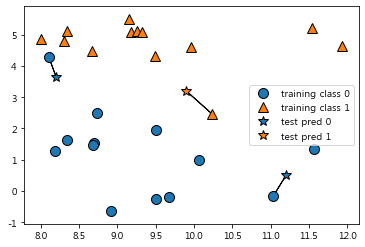

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=1)  # n_neighbors=1 이웃의 개수 1개로 두겠다 

# 이진데이터(●, ▲), 새로운 데이터(=테스트용, ★)
# 새로운 데이터를 ●, ▲ 어떤 것으로 대입시킬지?
# 제일 가까운 애로 분류하자  ->  측정도구(Measure) : 거리 : L2 Norm 방식으로 측정
# 그래서 가까운 이웃들 선으로 연결시켜놓고, 연결된 애들 모양 따라가면됨

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


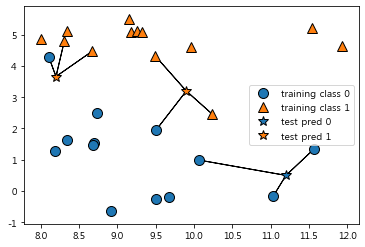

In [30]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # n_neighbors=3 이웃의 개수 3개로 두겠다 
# 제일 가까운 애들 세명 고르고
# 투표 방식으로 최종 선택
# 그렇기에 이웃의 개수는 거의 홀수개로 지정 

# 내가 이웃의 개수를 직접 지정해주는것 -> 하이퍼파라미터 

### L1 norm, L2 norm

In [31]:
# 주사위 게임(-3 ~ 3)

# L1 norm, L2 norm 계산시에 사용할 것  
from numpy import linalg

# 3명의 사람이 주사위 3번 던진 결과 df 만들기
df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3, 3)))
df.columns = ["move_1", "move_2", "move_3"]
df.head()
print(df)
print("-----------------------------------")

# 누가 제일 많이 걸었는가?  : L1 norm 사용
## 값들 뽑아오기
movements = df.values
movements
print(movements)
print("-----------------------------------")

## 걸은 수 더하기 
linalg.norm(movements, ord=1, axis=1) # ord=1 순서, L1 norm 을 쓰겠다, aixs=1 : 행방향 

   move_1  move_2  move_3
0       0       1       0
1       1      -2       1
2      -3       1       2
-----------------------------------
[[ 0  1  0]
 [ 1 -2  1]
 [-3  1  2]]
-----------------------------------


array([1., 4., 6.])

In [32]:
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3,2)))
df.columns=["x", "y"]
df

,x,y
0,2,8
1,3,3
2,4,1


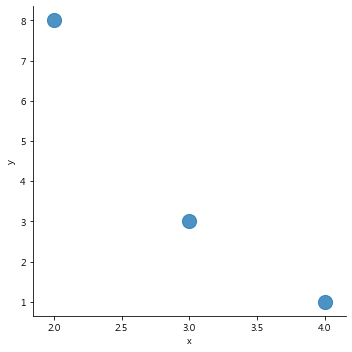

In [33]:
# 그래프 
sns.lmplot("x", "y", data=df, fit_reg=False, scatter_kws={"s":200}) # fit_reg=False : 회귀선 필요없을시, scatter_kws={"s":200} : 점 사이즈 

In [34]:
# 값 모으기
data_points = df.values
print(data_points)
print("--------------------")

# L2 norm 2차원 좌표에서 거리구할때 많이 사용 # 원점으로 부터의 직선 거리 
linalg.norm(data_points, ord=2, axis=1)

[[2 8]
 [3 3]
 [4 1]]
--------------------


array([8.24621125, 4.24264069, 4.12310563])

### KNN 구현

In [36]:
# 훈련시킬 준비 과정 
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
  # random_state=0 고정값으로 만들기 / 가장 기본 작업/ test용은 train용 다 확인 완료하기 전까지 보지말것
print(X_train.shape, X_test.shape, y_train, y_test)

(19, 2) (7, 2) [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0] [1 0 1 0 1 1 0]


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [51]:
# KNN 알고리즘으로 기계훈련 시켜주는거 선언해오기 
from sklearn.neighbors import KNeighborsClassifier

# 알고리즘 준비(어떤 방법으로 훈련할것인지 정해놓은거)
clf = KNeighborsClassifier(n_neighbors = 3) 

# 실제 훈련 매서드
clf.fit(X_train, y_train) # 데이터와 정답을 알려주고 훈련을 해라.. 라는 의미 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
# 학습(훈련) 결과 테스트 
clf.predict(X_test)  # 예측한다는 함수 / 7개 데이터로 예측한 결과 아래의 데이터로 예측할수있다 # 새로운데이터가 주어지면 여기에 넣어주면 된다 그럼 적어도 86% 성공률을 뽑아낼수있음 

# 테스트 정확도 측정
clf.score(X_test, y_test) # 테스트한 결과(X_test)와 정답(y_test)을 비교해서 평균내서 백분율로 나타내줌

0.8571428571428571

### KNN 분석

1
AxesSubplot(0.125,0.125;0.227941x0.755)
3
AxesSubplot(0.398529,0.125;0.227941x0.755)
9
AxesSubplot(0.672059,0.125;0.227941x0.755)


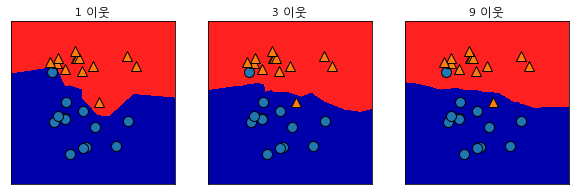

In [59]:
# 이웃 개수(k)에 따른 성능 차이 알아보기 

# 그래프 3개 그리기 (k = 1, 3, 9)
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) # axes 각 그래프에 대한 축의 위치값이 들어가있음 

# n_neigh 에는 1, 3, 9 / ax 는 각그래프의 위치값이 들어가게 됨 
for n_neigh, ax in zip([1, 3, 9], axes):
    print(n_neigh)
    print(ax)
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X, y) # 첫번째 훈련결과 첫번째 그래프에 찍고 ~~ 등등 
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax) # 산포도로 그려보기 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax) # 경계선을 그려주는 함수 # fill=True 배경색 채우기 
    # 이웃개수가 적을수록(k=1) 너무 훈련데이터에만 집중되어있는 것을 볼수있다 / 각각의 값에 기준선이 다 따라다니고 있음을 볼수있다 
    # 이웃개수가 많을수록(k=9) 선이 직선에 가까워지고 단순한 모습임을 볼수있다 
    # 너무 복잡하지도 않으면서 너무 단순하지도 않은 형태를 갖는 k값이 무엇인지 잘 알아야한다 
    
    ax.set_title("{} 이웃".format(n_neigh))

In [65]:
# 유방암 데이터 샘플
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 

# 데이터 개수 확인 
cancer.data.shape

# 어떤 데이터를 가지고 판단할 것인지에 따라 클래스 지정이 달라짐
# 위 데이터는 병이 있을 경우 양성클래스, 병이 없을 경우 음성클래스 로 나뉜다 

# 훈련시킬 준비 과정 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66,
                                                   stratify=cancer.target)
   # stratify : 계층, 실제 데이터에 있는 비율을 훈련용과 테스트용에 똑같이 지정해주는것
    
#훈련용, 테스트용 몇개씩 나뉘어졌는지 살펴보자아아아아아아
print(X_train.shape, X_test.shape) 

(426, 30) (143, 30)


In [76]:
# 이웃의 개수에 따라 정확도 비교해보기 

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

# 훈련 세트의 정확도 
print(clf.score(X_train, y_train)) 

# 테스트 세트의 정확도
print(clf.score(X_test, y_test))

# n_neighbors = 1일때 train = 1, test = 0.9 / 새로운 데이터에는 적응을 못하는 '과대적합' 생성

1.0
0.9020979020979021


0.8881118881118881


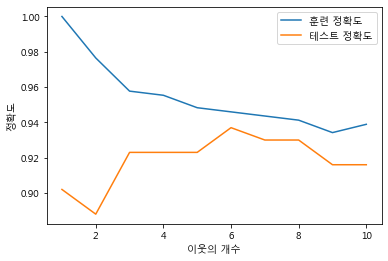

In [83]:
# 반복문을 돌려 이웃의 개수에 따라 정확도 비교해보기 

# 반복문 결과물 변수 설정
train_acc = []
test_acc = []

for n_neigh in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neigh)
    clf.fit(X_train, y_train)

    # 훈련 세트의 정확도 
    train_acc.append(clf.score(X_train, y_train))

    # 테스트 세트의 정확도
    test_acc.append(clf.score(X_test, y_test))
    
# for문을 토대로 그래프 그리기

plt.plot(range(1, 11), train_acc, label="훈련 정확도") 
# 이웃이 늘어날수록 정확도가 나빠지는 현상을 볼 수 있음 

plt.plot(range(1, 11), test_acc, label="테스트 정확도") 
# k = 6일때 가장 적절함을 보인다 (과대적합이 적다)

plt.ylabel("정확도")
plt.xlabel("이웃의 개수")
plt.legend()

# 그래프에서 두번재 값이 제일 낮아서 얼마나왔는지 궁금해서 찍어봄.....
print(test_acc[1])

### 회귀분석을 위한 KNN
(분류 알고리즘이지만 회귀 알고리즘으로도 사용 가능)

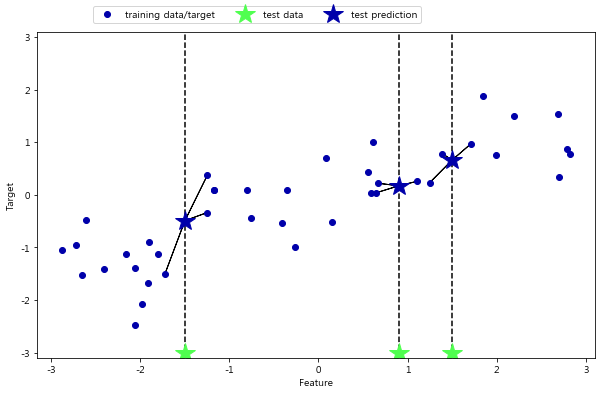

In [88]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 새로운 3개의 데이터(★) 가장 가까운 이웃과 연결되어있음
# 연결된 이웃들(n_neighbors)의 평균값을 예측값으로 지정 
# 분류 알고리즘이지만 연결된 이웃들의 평균값을 사용하여 회귀 알고리즘으로도 사용 가능

In [95]:
# 회귀 분석용 샘플
X, y = mglearn.datasets.make_wave(n_samples=40) # 2차원 배열 40개 만들기

# 훈련시킬 준비 과정 (test, train 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 훈련용, 테스트용 몇개씩 나눠졌는지 알아보기 
print(X_train.shape, X_test.shape)

(30, 1) (10, 1)


In [93]:
# 추가
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3)

# 훈련
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [97]:
print("테스트 세트 예측 : ", reg.predict(X_test))

테스트 세트 예측 :  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [99]:
# 회귀분석에서의 정확도는 어느정도 관계에 영향을 미치는지가 중요
# 설명계수 R^2 이 중요
print("설명계수(R^2) : ", reg.score(X_test, y_test)) # 연관성 중요 0.83 정도면 연관성 좋은거래여......

설명계수(R^2) :  0.8344172446249604


### KNeighborsRegressor  분석

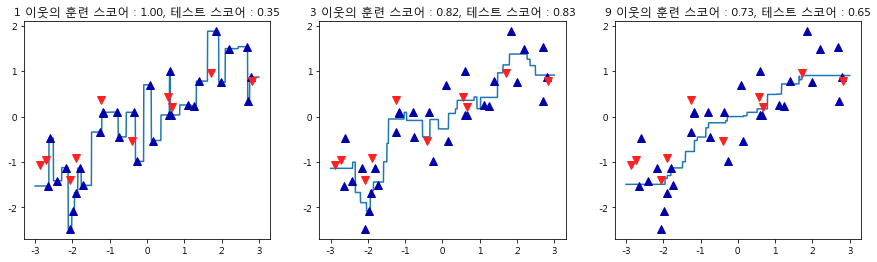

In [118]:
# 이웃의 개수에 따라 복잡도가 어떻게 나눠지는지 확인해보기

# 그래프 3개 그리기 (k = 1, 3, 9)
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # axes 각 그래프에 대한 축의 위치값이 들어가있음 

# 연속적인 범위 지정(-3부터 3까지 1000개의 그래프)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# n_neigh 에는 1, 3, 9 / ax 는 각그래프의 위치값이 들어가게 됨 
for n_neigh, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neigh).fit(X_train, y_train)
    
    # 회귀분석이므로 연속적인 선그래프 그리기
    ax.plot(line, reg.predict(line))
    # 그래프를 통해 이웃의 개수에 따라 복잡도가 결정됨을 볼수있다
    # 이웃의 개수가 증가할수록 단순해짐
    
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8) # "" 모양 지정, 
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0} 이웃의 훈련 스코어 : {1:.2f}, 테스트 스코어 : {2:.2f}".format(n_neigh,
                 reg.score(X_train, y_train), reg.score(X_test, y_test)))

In [102]:
# 연속적인 범위 지정(-3부터 3까지 1000개의 그래프)
# 임의의 난수, 무의미한 값들 1000개 테스트 하기 
# 이걸 데이터로 넘겨주려면 2차원으로 넘겨줘야함 -> 구조변경해야함 (reshape 사용)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
line

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598],
       [-2.96996997],
       [-2.96396396],
       [-2.95795796],
       [-2.95195195],
       [-2.94594595],
       [-2.93993994],
       [-2.93393393],
       [-2.92792793],
       [-2.92192192],
       [-2.91591592],
       [-2.90990991],
       [-2.9039039 ],
       [-2.8978979 ],
       [-2.89189189],
       [-2.88588589],
       [-2.87987988],
       [-2.87387387],
       [-2.86786787],
       [-2.86186186],
       [-2.85585586],
       [-2.84984985],
       [-2.84384384],
       [-2.83783784],
       [-2.83183183],
       [-2.82582583],
       [-2.81981982],
       [-2.81381381],
       [-2.80780781],
       [-2.8018018 ],
       [-2.7957958 ],
       [-2.78978979],
       [-2.78378378],
       [-2.77777778],
       [-2.77177177],
       [-2.76576577],
       [-2.75975976],
       [-2.75375375],
       [-2.74774775],
       [-2.74174174],
       [-2.73573574],
       [-2

### iris를 이용한 사례

In [130]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.target_names) # 품종이름
print(iris.feature_names)

# 테스트용 훈련용 나누기 
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # X는 2차원배열 y(정답)는 1차원 배열

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(112, 4) (38, 4) (112,) (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015194B48>,
      dtype=object)

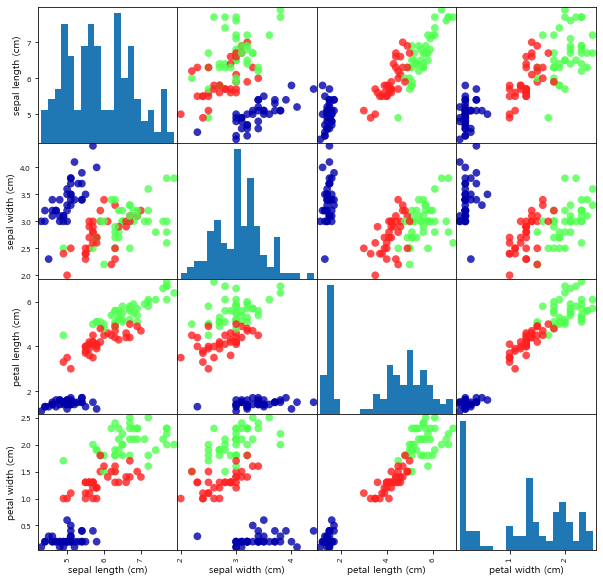

In [143]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)

# 판다스 객체에서 사용하는것이라 dataframe 형태로 넘겨주기 
pd.plotting.scatter_matrix(iris_df, figsize=(10, 10), marker="o", c=y_train, s=60, alpha=.8, \
                          cmap=mglearn.cm3, hist_kwds={"bins":20}) # c=y_train : 품종별로 색 다르게 하기 / cmap : 색상 뚜렷이

# sepal length + sepal width 세 품종 분류 하기 힘듦
# petal width + petal length 세 품종을 가장 잘 분류해줌
# 어떤 특성이 가장 큰 영향을 주는지 알아보자


In [153]:
# KNN 분류 알고리즘 : 가장 가까운 이웃으로 분류하는 방법

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # X, y 같이 넣어서 훈련시키자...
X_train.shape # 2 차원으로 맞춰주기 

(112, 4)

In [152]:
# 예측
pred = knn.predict(X_test) # 예측이니까 y는 주지 않고 X_test만 주기 
pred 

# 정확도 확인
print("정확도 :", knn.score(X_test, y_test)) # 97% 의 높은 정확도를 보여줌 # 거리 측정만으로도 좋은 성적을 낼수있넹....ㅎ
print("정확도 :", np.mean(pred == y_test)) # 위에 꺼랑 같은 의미임..

정확도 : 0.9736842105263158
정확도 : 0.9736842105263158


In [157]:
# 꽃받침(Sepal)의 길이가 5cm, 폭 2.9cm, 꽃잎(Petal)의 길이 1cm, 폭 0.2cm 인 붓꽃의 품종은?

x_new = np.array([[5, 2.9, 1, 0.2]]) # X_train 이 2차원 배열이므로 [[]]
pred = knn.predict(x_new)
pred # 0 번째에 있다고 알려줌
print(iris.target_names[pred]) # 이런 특징을 갖는 품종은 setosa 라고 알려줌. 아까 97%의 정확도를 보여줬으니 맞을 것이다.....

['setosa']


### 영화 분류 프로그램 만들기
knn.pdf 참고 / 
데이터의 kick count와 kiss count를 통해 영화가 Action인지 Romantic인지 예측하기 

In [210]:
# dict를 sort해주기 위해 불러오기
import operator

# 데이터 준비해주는 함수 만들기
def createDataSet():
    group = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 2.0], [4.0, 2.0]]) # [x좌표, y좌표]
    label = ["Action", "Action", "Romance", "Romance"]
    return group, label    

# L2 norm 방식으로 거리 계산하는 함수
def calcDistance(x_new, data):
    # 데이터 개수 
    datasize = data.shape[0] # X.shape (4, 2) 2차원 배열
    diffMat = np.tile(x_new, (datasize, 1)) - data # 현재 x_new 데이터를 4행 2열로 반복 해주겠다 # 2차원 배열을 이용한 거리의 차이 
    
    # L2 norm 공식 적용(피타고라스 정리)
    sqDiffMat = diffMat**2 # 제곱
    sqDistance = sqDiffMat.sum(axis=1) # 행기준
    distance = sqDistance**0.5 
    
    sortedDistance = distance.argsort() # 인덱스 위치 알려주는..
    return sortedDistance
    
# 다수결에 따라 결과 선출하기 위한 최종목표 함수 
def findMajorityClass(x_new, target, k, sortedDistance):
    classCount = {} # 키와 값을 각각의 클래스와 개수로 나타낼 변수 준비 # {"Action":0, ,,,}  등의 형태로.. 
    
    # 이웃의 개수만큼 반복 돌리기
    for i in range(k):
        votelabel = target[sortedDistance[i]]
        
        # Action의 값 2, Romance 값 1 로 나오도록 하기
        classCount[votelabel] = classCount.get(votelabel, 0) + 1 # get : 키값 뽑아오기, 값이 없을경우 0으로 대체 # 왜 +1....???ㅎㅎㅎ
                
        # sorted 이용하여 dict에 해당하는 변수명 넣어주기 
        return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True) 
        
# 분류 함수 
def classify(x_new, data, target, k):
    sortedDistance = calcDistance(x_new, data) # 새로운 데이터와 기존 데이터와의 거리 계산하기 # [0, 1, 3, 2]
    sortedDistanceCount = findMajorityClass(x_new, target, k, sortedDistance) # 다수결의 원칙에 의해 어느 그룹인지 선택할수있음
    
    return sortedDistanceCount

In [ ]:
##### 은주언니꺼!!!!
def creatDataSet():
    group = np.array([[1.0, 2.0], [1.0, 4.0] , [4.0, 1.0], [4.0, 2.0]]) # 앞 두개는 액션 / 뒤 두개는 로맨스로 분류
    label = ["Action", "Action", "Romance", "Romance"]
    return group, label


# 거리계산 함수
def calcDistance(x_new, data):
    # 데이터 갯수
    dataSize = data.shape[0]
    diffMat = np.tile(x_new, (dataSize, 1)) - data # x_new를 4행(dataSize) 1열로 찍고 - data
    
    # L2 norm 공식 적용
    sqDiffMat = diffMat**2 # 제곱
    sqDistance = sqDiffMat.sum(axis=1) # 2차원 배열이기 때문에 행 기준으로 합계
    distance = sqDistance**0.5 # 제곱근
    print(distance)
    
    # 정렬을 시켜줄건데...
    sortedDistance = distance.argsort()
    return sortedDistance    


# 다수결에 해서 어느 그룹인지 선택하는 함수
def findMajorityClass(x_new, target, k, sortedDistance):
    classCount = {}
    
    # 이웃의 갯수만큼 반복
    for i in range(k):
        voteLabel = target[sortedDistance[i]]
#         print("voteLabel", voteLabel)
#         print("이게 뭔데1", classCount.get(voteLabel, 0))
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
#         print("이게 뭔데2", classCount.get(voteLabel, 0))
#         print(classCount)
        
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)


def classify(x_new, data, target, k): # 새로 입력될 데이터, 실제영화데이터, 정답, 이웃의 갯수
    # 거리 결과값 받을 변수
    sortedDistance = calcDistance(x_new, data) # [0 1 3 2] → 거리 계산한 결과값을 돌려받쥬
    # 다수결에 해서 어느 그룹인지 선택할 수 있도록
    sortedDistanceCount = findMajorityClass(x_new, target, k, sortedDistance)
    
    return sortedDistanceCount

In [212]:
# 함수 대입 
X, y = createDataSet()

# 이 x, y 좌표를 갖는 것은 어떤 영화인가?
result = classify([2.0, 3.0], X, y, 3) # x_new, data, target, k # X 값에서 거리가 얼마나 차이 나느냐에 따라 영화 분류해줌 
print("결과는 {} 영화다".format(result[0][0]))


결과는 Action 영화다


In [178]:
# tile

A = 1   # 스칼라
B = np.array([0, 1])   # 1차원 배열
C = np.array([[0, 1], [2, 3]])   # 2차원 배열

np.tile(A, 3) # 하나의 값이 타일을 붙이듯이 3번 반복해준다
np.tile(B, 3) # 1차원 배열 3번 반복
np.tile(C, 3) # 각각 3번 반복

np.tile(A, (2, 3)) # A의 값으로 2행 3열의 형태 만듦
np.tile(B, (2, 3))
np.tile(C, (2, 3))

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])

In [201]:
# dict를 정렬 (리스트나 튜플로 바꿔서 정렬하기) (dict자체에는 정렬기능이 없으므로 operator를 사용해줘야함)
import operator

x = {"1":2, "3":4, "4":3, "2":1, "0":0} # 값으로 sort 할것인지 key로 sort 할것인지 정하기 

# 값으로 sort
sorted(x.items(), key=operator.itemgetter(1))

# 키로 sort
x = {1:2, 3:4, 4:3, 2:1, 0:0}
sorted(x.items(), key=operator.itemgetter(0)) # operator를 이용하여 dict를 sort 하면 된다 

[(0, 0), (1, 2), (2, 1), (3, 4), (4, 3)]